# Sleeper API Data Pulling

This notebook serves as a way to refresh the data using API calls for Sleeper.

In [1]:
# Begin imports
import sleeper # Python wrapper for the Sleeper API

import pandas as pd
import numpy as np
import nfl_data_py as nfl

from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
# End imports

In [2]:
# Begin Global Variables

# Set up directories to cache our data
raw_data_directory = Path.cwd().parents[0] / "data/raw"
processed_data_directory = Path.cwd().parents[0] / "data/processed"

# Set up league info
sleeper_league_ID = "863912024172847104"

# End Global Variables

# Pull Player Info

In [3]:
from sleeper.api import PlayerAPIClient
from sleeper.enum import Sport, TrendType
from sleeper.model import Player, PlayerTrend

# Please don't run more than 1x per day - large data request from the API and you risk being 
# IP Banned if you run it multiple times
nfl_players: dict[str, Player] = PlayerAPIClient.get_all_players(sport=Sport.NFL)

In [4]:
nfl_player_df = pd.DataFrame([player.__dict__ for player in nfl_players.values()])
nfl_player_df.to_csv(raw_data_directory / "nfl_players.csv")
#nfl_player_df['full_name'] = nfl_player_df.first + nfl_player_df.last
nfl_player_df

,active,age,birth_city,birth_country,birth_date,birth_state,college,depth_chart_order,depth_chart_position,espn_id,...,search_rank,sport,sportradar_id,stats_id,status,swish_id,team,weight,yahoo_id,years_exp
0,False,27.0,None,None,1991-04-22,None,Temple,NaN,None,17054.0,...,9999999.0,Sport.NFL,4cd4976e-e230-4935-ad3f-c12876a41350,NaN,NFLPlayerStatus.INACTIVE,NaN,NFLTeam.NA,285,27841.0,1.0
1,False,NaN,None,None,None,None,North Carolina State,NaN,None,3916426.0,...,9999999.0,Sport.NFL,9ff46edb-988f-4c8a-ad56-0502808ca1a6,NaN,NFLPlayerStatus.INACTIVE,NaN,NFLTeam.NA,330,32538.0,0.0
2,False,28.0,None,None,1993-12-10,None,Troy,NaN,None,2972820.0,...,9999999.0,Sport.NFL,a2b6e1f9-1f06-45e3-b6e9-79ec8490e5ef,NaN,NFLPlayerStatus.INACTIVE,NaN,NFLTeam.NA,302,30198.0,5.0
3,True,22.0,None,None,2000-07-19,None,UTSA,1.0,RG,NaN,...,9999999.0,Sport.NFL,129815b7-f914-4155-b8e3-e93021670dd7,NaN,NFLPlayerStatus.ACTIVE,1123542.0,NFLTeam.SF,300,NaN,0.0
4,True,26.0,None,None,1996-08-09,None,Western Illinois,2.0,LDT,3121634.0,...,9999999.0,Sport.NFL,757c55e1-2f3a-41d2-a211-16bf577a1586,NaN,NFLPlayerStatus.ACTIVE,831799.0,NFLTeam.KC,324,31916.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8906,False,24.0,None,None,1994-04-10,None,Georgia Southern,NaN,None,NaN,...,9999999.0,Sport.NFL,,NaN,NFLPlayerStatus.INACTIVE,NaN,NFLTeam.NA,183,29918.0,0.0
8907,True,27.0,None,None,1995-02-13,None,Virginia Tech,1.0,LCB,3045465.0,...,9999999.0,Sport.NFL,81ba31db-e21a-4944-8d0f-4e12cb83e3c4,NaN,NFLPlayerStatus.ACTIVE,742419.0,NFLTeam.WAS,198,29318.0,6.0
8908,True,26.0,None,None,1996-10-14,None,Ohio State,NaN,None,3915508.0,...,9999999.0,Sport.NFL,17a17a1a-787d-46b3-94c0-8d4e1928c492,NaN,NFLPlayerStatus.ACTIVE,878777.0,NFLTeam.JAX,255,33024.0,2.0
8909,False,25.0,None,None,1996-03-17,None,Penn State,NaN,None,3116155.0,...,9999999.0,Sport.NFL,6427f177-527b-435a-bcd1-27cf913f7e24,835780.0,NFLPlayerStatus.INACTIVE,NaN,NFLTeam.NA,212,31479.0,4.0


In [5]:
nfl_player_df["full_name"] = nfl_player_df.first_name + " " + nfl_player_df.last_name

## Pull Stats

So, sleeper has deprecated the "stats" portion of their own API, so in order to access player specific stats, we need to use a DIFFERENT library and then do some fancy joining on the player identification numbers between sleeper's DB and the following stats.

First, we pull the seasonal stats for the current season (2022)

In [6]:
stats_url = r'https://github.com/nflverse/nflverse-data/releases/download/player_stats/player_stats_2022.parquet'
stats_raw_data = pd.read_parquet(stats_url, engine='auto')

stats_raw_data.to_csv(raw_data_directory / "seasonal_player_stats_raw.csv")
stats_raw_data

,player_id,player_name,player_display_name,position,position_group,headshot_url,recent_team,season,week,season_type,...,receiving_first_downs,receiving_epa,receiving_2pt_conversions,racr,target_share,air_yards_share,wopr,special_teams_tds,fantasy_points,fantasy_points_ppr
0,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,1,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,10.38,10.38
1,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,2,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,9.40,9.40
2,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,3,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,14.74,14.74
3,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,4,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,25.40,25.40
4,00-0019596,T.Brady,Tom Brady,QB,QB,https://static.www.nfl.com/image/private/f_aut...,TB,2022,5,REG,...,0.0,NaN,0,NaN,NaN,NaN,NaN,0.0,19.74,19.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4127,00-0038134,K.Walker,Kenneth Walker,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2022,8,REG,...,0.0,-1.229772,0,0.166667,0.060606,0.022989,0.107001,0.0,11.20,12.20
4128,00-0038134,K.Walker,Kenneth Walker,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2022,9,REG,...,1.0,-8.620274,0,-1.052632,0.125000,-0.253333,0.010167,0.0,24.90,27.90
4129,00-0038134,K.Walker,Kenneth Walker,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2022,10,REG,...,2.0,1.827557,0,-3.235294,0.242424,-0.068548,0.315652,0.0,7.20,13.20
4130,00-0038134,K.Walker,Kenneth Walker,RB,RB,https://static.www.nfl.com/image/private/f_aut...,SEA,2022,12,REG,...,1.0,1.246270,0,-2.166667,0.027027,-0.020408,0.026255,0.0,15.90,16.90


Next we're going to filter things out by weeks (ensuring that we're only considering weeks up and including to a our league's regular season of 14...) and filter out some columns

In [7]:
stats_raw_data = stats_raw_data.loc[stats_raw_data.week < 15]

filtered_stats = stats_raw_data[
        ['player_id', 'player_name', 'player_display_name',
         'recent_team', 'season', 'week', 'carries', 'rushing_yards', 'rushing_tds',
         'rushing_first_downs', 'rushing_2pt_conversions', 'receptions', 'targets', 'receiving_yards', 'receiving_tds',
         'receiving_air_yards', 'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa',
         'fantasy_points_ppr', 'interceptions', 'sack_fumbles', 'sack_fumbles_lost', 'rushing_fumbles',
         'rushing_fumbles_lost', 'receiving_fumbles', 'receiving_fumbles_lost', 'position',
         'passing_yards', 'passing_tds', 'passing_2pt_conversions', 'receiving_2pt_conversions']].fillna(0)

season_long_stats = filtered_stats.drop(['recent_team', 'week'], axis=1).groupby(
        ['player_id', 'player_display_name', 'position']).sum().reset_index()

season_long_stats['gsis_id'] = season_long_stats['player_id']

# Robby Anderson changed his name to Robbie Anderson
season_long_stats.replace(to_replace='Robby Anderson', value="Robbie Anderson", inplace=True)

# Jeffery Wilson changed his name to Jeff Wilson
season_long_stats.replace(to_replace='Jeffery Wilson', value="Jeff Wilson", inplace=True)

# Phillip Walker goes by PJ Walker
season_long_stats.replace(to_replace = 'Phillip Walker', value = "P.J. Walker", inplace = True)

# Joe Fortson goes by Jody Fortson
season_long_stats.replace(to_replace = "Joe Fortson", value = "Jody Fortson", inplace = True)

# Mike woods goes by Michael Woods
season_long_stats.replace(to_replace = "Mike Woods", value = "Michael Woods", inplace = True)


C:\Users\Eric\AppData\Local\Temp\ipykernel_3112\3408998699.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ['player_id', 'player_display_name', 'position']).sum().reset_index()


Ok, now we're going to pull down the sleeper IDs and add them to this column

In [8]:
id_df = nfl.import_ids(ids = ["gsis","sleeper"])
id_df = id_df.loc[~id_df.sleeper_id.isna()]

id_df = id_df.loc[id_df.position.str.contains('|'.join(["QB", "RB", "WR", "TE", "K"]))]
id_df = id_df.loc[~id_df.team.str.contains("FA")]
# Gabriel Davis changed his name to Gabe Davis
id_df.replace(to_replace='gabriel davis', value = 'gabe davis', inplace = True)

sleeper_id_list = []

for index, player in season_long_stats.iterrows():
    #print("Looking for "+str(player.player_display_name.lower()))
    if (id_df.loc[id_df.merge_name == player.player_display_name.lower().replace(".","").replace("'","")].sleeper_id).empty:
        sleeper_id_list.append(np.nan)
    else:
        sleeper_id_list.append(str(int(id_df.loc[id_df.merge_name == player.player_display_name.lower().replace(".","").replace("'","")].sleeper_id)))

season_long_stats["sleeper_id"] = sleeper_id_list

C:\Users\Eric\anaconda3\envs\py310\lib\site-packages\nfl_data_py\__init__.py:660: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df = df[set(tgt_ids + rem_cols)]


In [9]:
season_long_stats.to_csv(processed_data_directory / "season_long_stats.csv")
season_long_stats

,player_id,player_display_name,position,season,carries,rushing_yards,rushing_tds,rushing_first_downs,rushing_2pt_conversions,receptions,...,rushing_fumbles,rushing_fumbles_lost,receiving_fumbles,receiving_fumbles_lost,passing_yards,passing_tds,passing_2pt_conversions,receiving_2pt_conversions,gsis_id,sleeper_id
0,00-0019596,Tom Brady,QB,26286,22,-7.0,0,1.0,0,0,...,1.0,1.0,0.0,0.0,3585.0,17,1,0,00-0019596,167
1,00-0023459,Aaron Rodgers,QB,26286,20,67.0,0,5.0,0,0,...,2.0,2.0,0.0,0.0,2864.0,22,2,0,00-0023459,96
2,00-0024243,Marcedes Lewis,TE,8088,0,0.0,0,0.0,0,3,...,0.0,0.0,0.0,0.0,0.0,0,0,1,00-0024243,111
3,00-0026143,Matt Ryan,QB,22242,24,70.0,1,9.0,0,0,...,3.0,2.0,0.0,0.0,2875.0,13,0,0,00-0026143,24
4,00-0026158,Joe Flacco,QB,8088,3,6.0,0,1.0,0,0,...,0.0,0.0,0.0,0.0,902.0,5,0,0,00-0026158,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,00-0038120,Breece Hall,RB,14154,80,463.0,4,20.0,0,19,...,0.0,0.0,1.0,1.0,0.0,0,0,0,00-0038120,8155
572,00-0038124,Christian Watson,WR,20220,5,68.0,2,2.0,0,25,...,0.0,0.0,0.0,0.0,0.0,0,0,0,00-0038124,8167
573,00-0038128,Malik Willis,QB,10110,19,72.0,0,3.0,0,0,...,2.0,2.0,0.0,0.0,157.0,0,0,0,00-0038128,8161
574,00-0038129,Cade Otton,TE,20220,0,0.0,0,0.0,0,36,...,0.0,0.0,0.0,0.0,0.0,0,0,0,00-0038129,8111


# Apply League Scoring to Stats

In [10]:
from sleeper.api import LeagueAPIClient
from sleeper.enum import Sport
from sleeper.model import League, Roster, User, Matchup, PlayoffMatchup, Transaction, TradedPick, SportState

League = LeagueAPIClient.get_league(league_id=sleeper_league_ID)
League_rosters: list[Roster] = LeagueAPIClient.get_rosters(league_id=sleeper_league_ID)
League.scoring_settings

2022-12-15 07:38:03 WARNING  Unknown value for SeasonStatus: 'post_season'.


ScoringSettings(blk_kick=2.0, blk_kick_ret_yd=None, bonus_pass_yd_300=None, bonus_pass_yd_400=None, bonus_rec_yd_100=None, bonus_rec_yd_200=None, bonus_rush_yd_100=None, bonus_rush_yd_200=None, def_2pt=None, def_pass_def=None, def_st_ff=1.0, def_st_fum_rec=1.0, def_st_td=6.0, def_td=6.0, ff=1.0, fg_ret_yd=None, fgm=None, fgm_0_19=3.0, fgm_20_29=3.0, fgm_30_39=3.0, fgm_40_49=4.0, fgm_50p=5.0, fgmiss=-1.0, fgmiss_0_19=None, fgmiss_20_29=None, fgmiss_30_39=None, fgmiss_40_49=None, fgmiss_50p=None, fum=-1.0, fum_lost=-2.0, fum_rec=2.0, fum_ret_yd=None, idp_blk_kick=None, idp_def_td=None, idp_ff=None, idp_fum_rec=None, idp_int=None, idp_pass_def=None, idp_sack=None, idp_safe=None, idp_tkl=None, idp_tkl_ast=None, idp_tkl_solo=None, int=2.0, int_ret_yd=None, kr_td=None, kr_yd=None, pass_2pt=2.0, pass_att=None, pass_cmp=None, pass_cmp_40p=None, pass_inc=None, pass_int=-1.0, pass_sack=None, pass_td=4.0, pass_yd=0.03999999910593033, pr_td=None, pr_yd=None, pts_allow_0=10.0, pts_allow_14_20=1.0, 

In [11]:
def calculate_score(player, scoring):
    """Given a player (pd.series) and scoring_settings (from sleeper API),
       calculate the total score based on the players stats and the league's
       scoring settings. Return as a floating point or NaN"""
    
    # Passing Scoring
    pass_score = (player.passing_yards * scoring.pass_yd) + (player.passing_tds * scoring.pass_td) + (player.passing_2pt_conversions * scoring.pass_2pt)

    # Rushing Scoring
    rush_score = (player.rushing_yards * scoring.rush_yd) + (player.rushing_tds * scoring.rush_td) + (player.rushing_2pt_conversions * scoring.rush_2pt)

    # Receiving Scoring
    receiving_score = (player.receptions * scoring.rec) + (player.receiving_yards * scoring.rec_yd) + (player.receiving_tds * scoring.rec_td) + (player.receiving_2pt_conversions * scoring.rec_2pt)

    # Negative Plays (fumbles and interceptions)
    negative_score = (player.interceptions * scoring.pass_int) + (player.sack_fumbles * scoring.fum) + (player.sack_fumbles_lost * scoring.fum_lost) + (player.rushing_fumbles * scoring.fum) + (player.rushing_fumbles_lost * scoring.fum_lost) + (player.receiving_fumbles * scoring.fum) + (player.receiving_fumbles_lost * scoring.fum_lost)
    
    # Total Score
    total_score = pass_score + rush_score + receiving_score + negative_score
    return(total_score)

score_list = []
for index, player in season_long_stats.iterrows():
    score_list.append(calculate_score(player, League.scoring_settings))
    
season_long_stats["league_score"] = score_list

In [12]:
season_long_stats["positional_rank"] = season_long_stats.groupby("position")['league_score'].rank(ascending = False)
season_long_stats.loc[season_long_stats.position == "WR"].sort_values("positional_rank")[:24]

,player_id,player_display_name,position,season,carries,rushing_yards,rushing_tds,rushing_first_downs,rushing_2pt_conversions,receptions,...,receiving_fumbles,receiving_fumbles_lost,passing_yards,passing_tds,passing_2pt_conversions,receiving_2pt_conversions,gsis_id,sleeper_id,league_score,positional_rank
385,00-0036322,Justin Jefferson,WR,26286,4,24.0,1,2.0,0,99,...,0.0,0.0,34.0,0,0,1,00-0036322,6794,247.260002,1.0
52,00-0031381,Davante Adams,WR,26286,3,-1.0,0,0.0,0,82,...,1.0,0.0,0.0,0,0,0,00-0031381,2133,236.600002,2.0
119,00-0033040,Tyreek Hill,WR,26286,6,30.0,0,2.0,0,100,...,1.0,0.0,0.0,0,0,0,00-0033040,3321,234.000002,3.0
65,00-0031588,Stefon Diggs,WR,26286,0,0.0,0,0.0,0,94,...,1.0,0.0,0.0,0,0,0,00-0031588,2449,229.900002,4.0
326,00-0035676,A.J. Brown,WR,26286,0,0.0,0,0.0,0,65,...,2.0,2.0,0.0,0,0,0,00-0035676,5859,188.500002,5.0
474,00-0036963,Amon-Ra St. Brown,WR,24264,7,89.0,0,3.0,0,82,...,0.0,0.0,0.0,0,0,0,00-0036963,7547,175.700001,6.0
394,00-0036358,CeeDee Lamb,WR,26286,9,46.0,0,3.0,0,74,...,0.0,0.0,0.0,0,0,0,00-0036358,6786,173.700002,7.0
88,00-0032211,Tyler Lockett,WR,26286,0,0.0,0,0.0,0,71,...,1.0,1.0,0.0,0,0,0,00-0032211,2374,170.100001,8.0
429,00-0036613,Jaylen Waddle,WR,26286,2,17.0,0,0.0,0,59,...,1.0,1.0,0.0,0,0,0,00-0036613,7526,164.500002,9.0
236,00-0034775,Christian Kirk,WR,26286,4,7.0,0,0.0,0,67,...,0.0,0.0,0.0,0,0,0,00-0034775,4950,163.600001,10.0


# Pull Draft Info

In [13]:
from sleeper.api import DraftAPIClient
from sleeper.model import Draft
from sleeper.model import DraftPick
from sleeper.model import PlayerDraftPick

# get all drafts for a the league
league_drafts: list[Draft] = DraftAPIClient.get_drafts_in_league(league_id=sleeper_league_ID)

# Get the picks from the first draft in the league
draft_picks: list[PlayerDraftPick] = DraftAPIClient.get_player_draft_picks(draft_id=league_drafts[0].draft_id, sport=Sport.NFL)

# Shove all of those picks into a dataframe and log it
draft_df = pd.DataFrame([pick.__dict__ for pick in draft_picks])
draft_df = pd.merge(draft_df, pd.DataFrame(draft_df.metadata.values.tolist()), on = "player_id").drop("metadata", axis = 1)
draft_df.to_csv(raw_data_directory / "draft_picks.csv")

2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.
2022-12-15 07:38:04 WARNING  Unknown value for NFLPlayerStatus: ''.


In [14]:
draft_df

,draft_id,draft_slot,is_keeper,pick_no,picked_by,player_id,roster_id,round,first_name,injury_status,last_name,news_updated,number,position,sport,status,team
0,863912024172847105,1,None,1,455204806886158336,6813,14,1,Jonathan,InjuryStatus.NA,Taylor,1661664362396,28,NFLPosition.RB,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.IND
1,863912024172847105,2,None,2,605279643485933568,4034,9,1,Christian,InjuryStatus.NA,McCaffrey,1661550311801,22,NFLPosition.RB,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.CAR
2,863912024172847105,3,None,3,605249638039109632,3198,5,1,Derrick,InjuryStatus.NA,Henry,1662096645655,22,NFLPosition.RB,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.TEN
3,863912024172847105,4,None,4,340485204214874112,4663,1,1,Austin,InjuryStatus.NA,Ekeler,1661638259523,30,NFLPosition.RB,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.LAC
4,863912024172847105,5,None,5,618292946139164672,4029,12,1,Dalvin,InjuryStatus.NA,Cook,1661537410200,4,NFLPosition.RB,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.MIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,863912024172847105,5,None,192,618292946139164672,7670,12,14,Joshua,InjuryStatus.NA,Palmer,1661557812985,5,NFLPosition.WR,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.LAC
192,863912024172847105,4,None,193,340485204214874112,7066,1,14,K.J.,InjuryStatus.NA,Osborn,1661097920222,17,NFLPosition.WR,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.MIN
193,863912024172847105,3,None,194,605249638039109632,24,5,14,Matt,InjuryStatus.NA,Ryan,1661664962923,2,NFLPosition.QB,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.IND
194,863912024172847105,2,None,195,605279643485933568,7569,9,14,Nico,InjuryStatus.NA,Collins,1661484602427,12,NFLPosition.WR,Sport.NFL,NFLPlayerStatus.ACTIVE,NFLTeam.HOU


## Join all of these dataframes

In [15]:
# First Merge on player_id (a sleeper only id)
draft_with_stats = pd.merge(draft_df, season_long_stats, left_on = "player_id", right_on = "sleeper_id", how = "left")
draft_with_stats

,draft_id,draft_slot,is_keeper,pick_no,picked_by,player_id_x,roster_id,round,first_name,injury_status,...,receiving_fumbles,receiving_fumbles_lost,passing_yards,passing_tds,passing_2pt_conversions,receiving_2pt_conversions,gsis_id,sleeper_id,league_score,positional_rank
0,863912024172847105,1,None,1,455204806886158336,6813,14,1,Jonathan,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,0.0,0.0,00-0036223,6813,127.600001,22.0
1,863912024172847105,2,None,2,605279643485933568,4034,9,1,Christian,InjuryStatus.NA,...,0.0,0.0,34.0,1.0,0.0,0.0,00-0033280,4034,233.560002,3.0
2,863912024172847105,3,None,3,605249638039109632,3198,5,1,Derrick,InjuryStatus.NA,...,2.0,1.0,4.0,1.0,0.0,0.0,00-0032764,3198,227.060002,4.0
3,863912024172847105,4,None,4,340485204214874112,4663,1,1,Austin,InjuryStatus.NA,...,2.0,1.0,0.0,0.0,0.0,0.0,00-0033699,4663,242.200002,2.0
4,863912024172847105,5,None,5,618292946139164672,4029,12,1,Dalvin,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,0.0,0.0,00-0033893,4029,174.500002,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,863912024172847105,5,None,192,618292946139164672,7670,12,14,Joshua,InjuryStatus.NA,...,1.0,0.0,0.0,0.0,0.0,0.0,00-0036988,7670,114.400001,33.0
192,863912024172847105,4,None,193,340485204214874112,7066,1,14,K.J.,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,0.0,0.0,00-0036345,7066,66.100000,69.0
193,863912024172847105,3,None,194,605249638039109632,24,5,14,Matt,InjuryStatus.NA,...,0.0,0.0,2875.0,13.0,0.0,0.0,00-0026143,24,142.999998,24.0
194,863912024172847105,2,None,195,605279643485933568,7569,9,14,Nico,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,0.0,0.0,00-0036554,7569,78.600001,55.0


In [16]:
draft_with_stats["pick_number"] = draft_with_stats.index
draft_with_stats["positional_pick"] = draft_with_stats.groupby("position_y")["pick_number"].rank(ascending = True)
draft_with_stats

,draft_id,draft_slot,is_keeper,pick_no,picked_by,player_id_x,roster_id,round,first_name,injury_status,...,passing_yards,passing_tds,passing_2pt_conversions,receiving_2pt_conversions,gsis_id,sleeper_id,league_score,positional_rank,pick_number,positional_pick
0,863912024172847105,1,None,1,455204806886158336,6813,14,1,Jonathan,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,00-0036223,6813,127.600001,22.0,0,1.0
1,863912024172847105,2,None,2,605279643485933568,4034,9,1,Christian,InjuryStatus.NA,...,34.0,1.0,0.0,0.0,00-0033280,4034,233.560002,3.0,1,2.0
2,863912024172847105,3,None,3,605249638039109632,3198,5,1,Derrick,InjuryStatus.NA,...,4.0,1.0,0.0,0.0,00-0032764,3198,227.060002,4.0,2,3.0
3,863912024172847105,4,None,4,340485204214874112,4663,1,1,Austin,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,00-0033699,4663,242.200002,2.0,3,4.0
4,863912024172847105,5,None,5,618292946139164672,4029,12,1,Dalvin,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,00-0033893,4029,174.500002,10.0,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,863912024172847105,5,None,192,618292946139164672,7670,12,14,Joshua,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,00-0036988,7670,114.400001,33.0,191,69.0
192,863912024172847105,4,None,193,340485204214874112,7066,1,14,K.J.,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,00-0036345,7066,66.100000,69.0,192,70.0
193,863912024172847105,3,None,194,605249638039109632,24,5,14,Matt,InjuryStatus.NA,...,2875.0,13.0,0.0,0.0,00-0026143,24,142.999998,24.0,193,22.0
194,863912024172847105,2,None,195,605279643485933568,7569,9,14,Nico,InjuryStatus.NA,...,0.0,0.0,0.0,0.0,00-0036554,7569,78.600001,55.0,194,71.0


In [17]:
draft_with_stats["delta_pick"] = draft_with_stats.positional_pick - draft_with_stats.positional_rank

In [18]:
from sleeper.api import UserAPIClient
from sleeper.model import User

user_dict = {}

for ID in draft_with_stats.picked_by.unique():
    user_dict[ID] = UserAPIClient.get_user(user_id = ID).username
    

draft_with_stats = draft_with_stats.replace({"picked_by": user_dict})

In [19]:
draft_with_stats = draft_with_stats[["pick_no", "round", "picked_by", "player_display_name", "sleeper_id",
                                     "league_score", "position_y", "positional_rank", "positional_pick", "delta_pick"]]

draft_with_stats.to_csv(processed_data_directory / "draft_with_stats.csv")

## Transactions

In [20]:
transaction_df = pd.concat([pd.DataFrame([transaction.__dict__ for transaction in LeagueAPIClient.get_transactions(league_id=sleeper_league_ID, week=i)]) for i in range(1,15)], ignore_index = True)
transaction_df.to_csv(raw_data_directory / "transaction_dataframe.csv")

In [21]:
transaction_df

,adds,consenter_ids,created,creator,draft_picks,drops,roster_ids,settings,status,status_updated,transaction_id,type,waiver_budget,leg,metadata
0,{'8228': 14},[14],1663125871266,455204806886158336,[],{'8142': 14},[14],"TransactionSettings(seq=1, waiver_bid=25)",TransactionStatus.COMPLETE,1663139073941,875617004143456256,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...
1,{'3423': 14},[14],1663125810752,455204806886158336,[],{'5995': 14},[14],"TransactionSettings(seq=12, waiver_bid=0)",TransactionStatus.FAILED,1663139073941,875616750329446400,TransactionType.WAIVER,[],1,"{'notes': 'Unfortunately, your roster will hav..."
2,{'6824': 8},[8],1663123966744,869626839986032640,[],None,[8],"TransactionSettings(seq=7, waiver_bid=2)",TransactionStatus.COMPLETE,1663139073941,875609015999213568,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...
3,{'49': 8},[8],1663116190454,869626839986032640,[],{'7062': 8},[8],"TransactionSettings(seq=14, waiver_bid=0)",TransactionStatus.COMPLETE,1663139073941,875576399874895872,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...
4,{'1387': 1},[1],1663114266597,340485204214874112,[],{'8138': 1},[1],"TransactionSettings(seq=6, waiver_bid=4)",TransactionStatus.COMPLETE,1663139073941,875568330633867264,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,{'BAL': 11},[11],1670461002501,605266609971470336,[],{'GB': 11},[11],"TransactionSettings(seq=0, waiver_bid=15)",TransactionStatus.COMPLETE,1670570076053,906382774423117824,TransactionType.WAIVER,[],14,{'notes': 'Your waiver claim was processed suc...
422,{'8138': 1},[1],1670460535486,340485204214874112,[],{'8148': 1},[1],None,TransactionStatus.COMPLETE,1670460535486,906380815619989504,TransactionType.FREE_AGENT,[],14,None
423,{'6984': 5},[5],1670460382677,605249638039109632,[],None,[5],None,TransactionStatus.COMPLETE,1670460382677,906380174692589568,TransactionType.FREE_AGENT,[],14,None
424,None,[5],1670460266458,605249638039109632,[],{'7527': 5},[5],None,TransactionStatus.COMPLETE,1670460266458,906379687230578688,TransactionType.FREE_AGENT,[],14,None


So, as you can see, the sleeper API gives us a bunch of interesting info...that isn't super human readable. For the adds/drops column, we have dictionaries containing strings representing the sleeper IDs of the players involved...but not their names or positions. For the consenter ids we have an integer represnting the roster IDs...but not the owner IDs nor their names. Crucial details like waiver bids appear to be contained within the 'settings' column - but as a TransactionSettings object.

Long story short, there's a lot to unpack - literally.

In [22]:
# First, let's get the roster list and cache it
League_roster_df = pd.DataFrame([roster.__dict__ for roster in League_rosters])
League_roster_df.to_csv(raw_data_directory / "League_rosters.csv")

# As you can see, this gives us a column of roster_ids and a column of owner_ids.
League_roster_df.head()

,co_owners,league_id,metadata,owner_id,players,player_map,reserve,roster_id,settings,starters,taxi
0,None,863912024172847104,"{'streak': '1W', 'record': 'LLLWLWWWWLWWLW'}",340485204214874112,"[1387, 4037, 4111, 4663, 4950, 5022, 5872, 598...",None,"[5022, 5872]",1,"RosterSettings(fpts=1479, fpts_against=1348, f...","[6797, 4111, 4663, 4037, 4950, 5985, 6945, 825...",None
1,None,863912024172847104,"{'streak': '2W', 'record': 'WWWWWLWWWWWLWW', '...",605175435638145024,"[1476, 2449, 4080, 4197, 4866, 5846, 5890, 591...",None,"[5917, 7608]",2,"RosterSettings(fpts=1591, fpts_against=1287, f...","[6904, 7543, 1476, 2449, 5846, 7600, 4866, 704...",None
2,None,863912024172847104,"{'streak': '5L', 'record': 'LLWLLWLWWLLLLL'}",605176209256583168,"[1166, 3271, 4040, 4958, 4983, 5012, 6130, 679...",None,[7090],3,"RosterSettings(fpts=1264, fpts_against=1414, f...","[1166, 6790, 8122, 7525, 4040, 5012, 6130, 495...",None
3,None,863912024172847104,"{'streak': '1L', 'record': 'LWLLLLLLLWLLWL'}",605180610515898368,"[2133, 3163, 3225, 4017, 4066, 4068, 4149, 419...",None,None,4,"RosterSettings(fpts=1306, fpts_against=1340, f...","[4017, 4199, 4149, 2133, 3225, 4066, 8112, 523...",None
4,None,863912024172847104,"{'streak': '1W', 'record': 'WWWLWLLWWWLWLW', '...",605249638039109632,"[1264, 24, 3164, 3198, 3214, 4046, 5086, 5880,...",None,None,5,"RosterSettings(fpts=1424, fpts_against=1347, f...","[4046, 3198, 3164, 7526, 5086, 5906, 6984, 126...",None


In [23]:
# From that df we can create a dictionary mapping the roster_id to the owner_id
roster_dict = dict(zip(League_roster_df.roster_id, League_roster_df.owner_id))

roster_dict

{1: '340485204214874112',
 2: '605175435638145024',
 3: '605176209256583168',
 4: '605180610515898368',
 5: '605249638039109632',
 6: '605445447401689088',
 7: '605263942515773440',
 8: '869626839986032640',
 9: '605279643485933568',
 10: '737782444484370432',
 11: '605266609971470336',
 12: '618292946139164672',
 13: '605254631701970944',
 14: '455204806886158336'}

In [24]:
# and because we have previously generated a user dict we can map the rosters directly to the username
roster_dict = {roster_id: user_dict[roster_dict[roster_id]] for roster_id in roster_dict.keys()}
roster_dict

{1: 'carlogesualdo',
 2: 'petenotpetey',
 3: 'phan497',
 4: 'andyhan4',
 5: 'ujthechamp',
 6: 'julesdefwatchesftbll',
 7: 'emilyhan',
 8: 'jakesmyth',
 9: 'niclath95',
 10: 'alexludtke',
 11: 'lauramarkey',
 12: 'anahan',
 13: 'llatham65',
 14: 'mattlatham'}

In [25]:
# We can also make a dictionary of sleeper_ids and display names as follows:
#player_dict = dict(zip(season_long_stats.sleeper_id, season_long_stats.player_display_name))
player_dict = dict(zip(nfl_player_df.player_id, nfl_player_df.full_name))

In [26]:
#### Great, now we have everything we need to make the Transactions dataframe a little more human readable.

# Begin by replacing the "created_by" column with the mapped value from the user_dict
#draft_with_stats = draft_with_stats.replace({"picked_by": user_dict})
transaction_df = transaction_df.replace({"creator" : user_dict})
# Get rid of all of the TransactionStatus.FAILED entries (useless to us)
#transaction_df = transaction_df.loc[transaction_df.status.astype(str) == "TransactionStatus.COMPLETE"]


# Get names of adds
adds_list = []

for iterator, dictionary in transaction_df['adds'].items():
    if(dictionary == None):
        adds_list.append(None)
    else:
        try:
            adds_list.append({player_dict[player_id] : roster_dict[dictionary[player_id]] for player_id in dictionary.keys()})
        except:
            adds_list.append(dictionary)

transaction_df["adds_named"] = adds_list


# Get names of drops
drops_list = []

for iterator, dictionary in transaction_df['drops'].items():
    if(dictionary == None):
        drops_list.append(None)
    else:
        try: 
            drops_list.append({player_dict[player_id] : roster_dict[dictionary[player_id]] for player_id in dictionary.keys()})
        except:
            drops_list.append(dictionary)
        
        
transaction_df["drops_named"] = drops_list


# Break transactions into waiver-wire pickups and trades
waiver_wire_df = transaction_df.loc[transaction_df.consenter_ids.str.len() == 1]
trades_df = transaction_df.loc[transaction_df.consenter_ids.str.len() > 1]

# Drop Failed Transactions from waiver_wire_df and trades_df
waiver_wire_df = waiver_wire_df.loc[waiver_wire_df.status.astype(str) == "TransactionStatus.COMPLETE"]
trades_df = trades_df.loc[trades_df.status.astype(str) == "TransactionStatus.COMPLETE"]

In [27]:
transaction_df

,adds,consenter_ids,created,creator,draft_picks,drops,roster_ids,settings,status,status_updated,transaction_id,type,waiver_budget,leg,metadata,adds_named,drops_named
0,{'8228': 14},[14],1663125871266,mattlatham,[],{'8142': 14},[14],"TransactionSettings(seq=1, waiver_bid=25)",TransactionStatus.COMPLETE,1663139073941,875617004143456256,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...,{'Jaylen Warren': 'mattlatham'},{'Alec Pierce': 'mattlatham'}
1,{'3423': 14},[14],1663125810752,mattlatham,[],{'5995': 14},[14],"TransactionSettings(seq=12, waiver_bid=0)",TransactionStatus.FAILED,1663139073941,875616750329446400,TransactionType.WAIVER,[],1,"{'notes': 'Unfortunately, your roster will hav...",{'Robbie Anderson': 'mattlatham'},{'Justice Hill': 'mattlatham'}
2,{'6824': 8},[8],1663123966744,jakesmyth,[],None,[8],"TransactionSettings(seq=7, waiver_bid=2)",TransactionStatus.COMPLETE,1663139073941,875609015999213568,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...,{'Donovan Peoples-Jones': 'jakesmyth'},None
3,{'49': 8},[8],1663116190454,jakesmyth,[],{'7062': 8},[8],"TransactionSettings(seq=14, waiver_bid=0)",TransactionStatus.COMPLETE,1663139073941,875576399874895872,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...,{'Robbie Gould': 'jakesmyth'},{'Rodrigo Blankenship': 'jakesmyth'}
4,{'1387': 1},[1],1663114266597,carlogesualdo,[],{'8138': 1},[1],"TransactionSettings(seq=6, waiver_bid=4)",TransactionStatus.COMPLETE,1663139073941,875568330633867264,TransactionType.WAIVER,[],1,{'notes': 'Your waiver claim was processed suc...,{'Rex Burkhead': 'carlogesualdo'},{'James Cook': 'carlogesualdo'}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,{'BAL': 11},[11],1670461002501,lauramarkey,[],{'GB': 11},[11],"TransactionSettings(seq=0, waiver_bid=15)",TransactionStatus.COMPLETE,1670570076053,906382774423117824,TransactionType.WAIVER,[],14,{'notes': 'Your waiver claim was processed suc...,{'Baltimore Ravens': 'lauramarkey'},{'Green Bay Packers': 'lauramarkey'}
422,{'8138': 1},[1],1670460535486,carlogesualdo,[],{'8148': 1},[1],None,TransactionStatus.COMPLETE,1670460535486,906380815619989504,TransactionType.FREE_AGENT,[],14,None,{'James Cook': 'carlogesualdo'},{'Jameson Williams': 'carlogesualdo'}
423,{'6984': 5},[5],1670460382677,ujthechamp,[],None,[5],None,TransactionStatus.COMPLETE,1670460382677,906380174692589568,TransactionType.FREE_AGENT,[],14,None,{'Tony Jones': 'ujthechamp'},None
424,None,[5],1670460266458,ujthechamp,[],{'7527': 5},[5],None,TransactionStatus.COMPLETE,1670460266458,906379687230578688,TransactionType.FREE_AGENT,[],14,None,None,{'Mac Jones': 'ujthechamp'}


Calculating scores associated with transactions...

This part is a little tricky. For each trasaction where a player is ADDED, calculate the number of points that player contributed to starting lineups in the reuglar season for the team that added the player.

To do this, first we need to get a df of all of the matchups

In [28]:
matchup_df = pd.DataFrame()
for week in range (1, 15):
    tmp_df = pd.DataFrame([matchup.__dict__ for matchup in LeagueAPIClient.get_matchups_for_week(league_id=sleeper_league_ID, week=week)])
    tmp_df["week"] = week
    matchup_df = pd.concat([matchup_df, tmp_df], ignore_index=True)
    
matchup_df.to_csv(raw_data_directory / "matchup_df.csv")
matchup_df

,custom_points,matchup_id,players,players_points,points,roster_id,starters,starters_points,week
0,None,2,"[BAL, 8138, 7606, 7066, 6083, 5872, 5849, 5022...","{'BAL': 13.0, '8138': -2.8, '7606': 2.3, '7066...",106.32,1,"[5849, 4663, 4137, 5872, 2197, 5022, 4950, 608...","[20.62, 9.2, 13.0, 10.6, 11.7, 7.5, 14.7, 6.0,...",1
1,None,7,"[DAL, 8126, 8119, 7600, 7543, 6904, 5955, 5937...","{'DAL': 5.0, '8126': 1.0, '8119': 16.5, '7600'...",122.42,2,"[6904, 4866, 7543, 2449, 5937, 7600, 5955, 391...","[24.72, 29.4, 6.5, 22.2, 8.0, 10.0, 2.6, 14.0,...",1
2,None,6,"[NE, 8153, 8129, 8121, 7525, 7523, 6806, 6790,...","{'NE': 6.0, '8153': 0.0, '8129': 4.4, '8121': ...",79.90,3,"[7523, 6790, 8129, 4983, 7525, 5012, 4040, 367...","[14.4, 25.0, 4.4, 6.5, 0.0, 7.7, 6.9, 9.0, 6.0]",1
3,None,5,"[TB, 8112, 7553, 7090, 6828, 5110, 4199, 4149,...","{'TB': 13.0, '8112': 9.9, '7553': 2.9, '7090':...",86.06,4,"[3294, 4199, 6828, 2133, 4068, 7553, 8112, 17,...","[5.46, 9.1, 17.6, 25.1, 2.0, 2.9, 9.9, 1.0, 13.0]",1
4,None,5,"[BUF, 8205, 8154, 8139, 7526, 5906, 5846, 5086...","{'BUF': 17.0, '8205': 11.2, '8154': 0.0, '8139...",96.40,5,"[4046, 3198, 3164, 7526, 5846, 5906, 5086, 126...","[33.9, 7.2, 5.4, 15.7, 4.1, 1.0, 6.1, 6.0, 17.0]",1
...,...,...,...,...,...,...,...,...,...
191,None,6,"[MIN, 8146, 8132, 7839, 7607, 7564, 6943, 6786...","{'MIN': -1.0, '8146': 10.8, '8132': 0.0, '7839...",97.96,10,"[1049, 7607, 2161, 7564, 6786, 5844, 8146, 783...","[17.76, 0.5, 28.9, 23.5, 5.8, 7.7, 10.8, 4.0, ...",14
192,None,4,"[BAL, 8228, 8150, 7611, 6803, 6650, 650, 6126,...","{'BAL': 11.0, '8228': 3.7, '8150': 3.4, '7611'...",105.12,11,"[167, 5850, 7611, 3321, 2309, 5001, 4018, 650,...","[12.12, 18.4, 2.0, 22.1, 5.2, 11.7, 11.6, 11.0...",14
193,None,7,"[TB, 8142, 7591, 6801, 6770, 5967, 4993, 49, 4...","{'TB': -1.0, '8142': 0.0, '7591': 0.0, '6801':...",80.76,12,"[6770, 5967, 4029, 2374, 6801, 4033, 4098, 49,...","[17.56, 20.2, 7.1, 14.5, 0.0, 15.2, 2.2, 5.0, ...",14
194,None,4,"[CLE, 8205, 8151, 7670, 7594, 6826, 6824, 6149...","{'CLE': 4.0, '8205': 10.8, '8151': 0.0, '7670'...",91.76,13,"[5870, 4988, 8205, 1689, 7670, 5857, 6824, 509...","[19.36, 6.9, 10.8, 16.0, 7.3, 0.0, 15.4, 12.0,...",14


In [29]:
def tabulate_starting_points(player_id, roster_id, matchup_df):
    """Given a player ID and a roster_id tabulate all of the points they contributed
       to the given roster over the course of the regular season"""
    points_list = []
    
    roster_matchups = matchup_df.loc[matchup_df.roster_id == roster_id]
    
    for index, row in roster_matchups.iterrows():
        if player_id in row.starters:
            player_index = row.starters.index(player_id)
            points_list.append(row.starters_points[player_index])
                               
    return(points_list)

def return_weeks_started(player_id, roster_id, matchup_df):
    """Given a player ID and a roster_id, return a list of weeks that the
       player was a starter on the given roster"""
    
    weeks_started_list = []
    roster_matchups = matchup_df.loc[matchup_df.roster_id == roster_id]
    
    for index, row in roster_matchups.iterrows():
        if player_id in row.starters:
            weeks_started_list.append(row.week)
            
    return(weeks_started_list)

In [30]:
# Split player name into its own column
player_name_list = []
for index, waiver_transaction in waiver_wire_df.iterrows():
    try:
        player_name_list.append(list(waiver_transaction.adds_named.keys())[0])
    except:
        player_name_list.append(None)
waiver_wire_df['added_player_name'] = player_name_list

# Add a new column summarizing the faab spent (if any)
faab_spent = []
for index, waiver_transaction in waiver_wire_df.iterrows():
    try:
        faab_spent.append(waiver_transaction.settings.waiver_bid)
    except:
        faab_spent.append(0)

waiver_wire_df['faab_spent'] = faab_spent

# Add a new column stating the total number of points that the added player
# contributed to starting lineups on the roster associated with the transaction
points_as_starter = []
points_as_starter_by_week = []
weeks_started = []

for index, waiver_transaction in waiver_wire_df.iterrows():
    if waiver_transaction.adds is None:
        points_as_starter.append(0)
        points_as_starter_by_week.append([0])
        weeks_started.append([])
    else:
        points_as_starter.append(sum(tabulate_starting_points(list(waiver_transaction.adds.keys())[0], waiver_transaction.roster_ids[0], matchup_df)))
        points_as_starter_by_week.append(tabulate_starting_points(list(waiver_transaction.adds.keys())[0], waiver_transaction.roster_ids[0], matchup_df))
        weeks_started.append(return_weeks_started(list(waiver_transaction.adds.keys())[0], waiver_transaction.roster_ids[0], matchup_df))
waiver_wire_df['points_as_starter'] = points_as_starter
waiver_wire_df['points_as_starter_by_week'] = points_as_starter_by_week
waiver_wire_df['weeks_started'] = weeks_started

# Add another new column with the 

In [31]:
waiver_wire_df.sort_values(by = "points_as_starter", ascending = False)[:20]

,adds,consenter_ids,created,creator,draft_picks,drops,roster_ids,settings,status,status_updated,...,waiver_budget,leg,metadata,adds_named,drops_named,added_player_name,faab_spent,points_as_starter,points_as_starter_by_week,weeks_started
14,{'1373': 9},[9],1663032157377,niclath95,[],{'7569': 9},[9],"TransactionSettings(seq=8, waiver_bid=1)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Geno Smith': 'niclath95'},{'Nico Collins': 'niclath95'},Geno Smith,1,148.72,"[11.68, 13.1, 19.08, 21.8, 18.2, 19.32, 22.98,...","[6, 7, 8, 9, 10, 12, 13, 14]"
329,{'5870': 13},[13],1667985974515,llatham65,[],{'829': 13},[13],None,TransactionStatus.COMPLETE,1667985974515,...,[],10,None,{'Daniel Jones': 'llatham65'},{'Andy Dalton': 'llatham65'},Daniel Jones,0,130.72,"[28.78, 8.04, 18.28, 26.64, 13.52, 16.1, 19.36]","[7, 8, 10, 11, 12, 13, 14]"
201,{'5870': 13},[13],1666175607889,llatham65,[],None,[13],None,TransactionStatus.COMPLETE,1666175607889,...,[],7,None,{'Daniel Jones': 'llatham65'},None,Daniel Jones,0,130.72,"[28.78, 8.04, 18.28, 26.64, 13.52, 16.1, 19.36]","[7, 8, 10, 11, 12, 13, 14]"
317,{'BUF': 5},[5],1668047459078,ujthechamp,[],None,[5],"TransactionSettings(seq=0, waiver_bid=20)",TransactionStatus.COMPLETE,1668216294498,...,[],10,{'notes': 'Your waiver claim was processed suc...,{'Buffalo Bills': 'ujthechamp'},None,Buffalo Bills,20,123.00,"[17.0, 19.0, 4.0, 7.0, 13.0, 8.0, 5.0, 6.0, 9....","[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]"
37,{'3163': 4},[4],1663561160541,andyhan4,[],{'2431': 4},[4],"TransactionSettings(seq=12, waiver_bid=0)",TransactionStatus.COMPLETE,1663743887989,...,[],2,{'notes': 'Your waiver claim was processed suc...,{'Jared Goff': 'andyhan4'},{'Mike Davis': 'andyhan4'},Jared Goff,0,119.08,"[14.88, 34.22, 1.52, 18.14, 12.38, 13.84, 6.5,...","[3, 4, 7, 8, 9, 10, 11, 12]"
32,{'PHI': 8},[8],1663677789004,jakesmyth,[],{'CIN': 8},[8],"TransactionSettings(seq=8, waiver_bid=3)",TransactionStatus.COMPLETE,1663743887989,...,[],2,{'notes': 'Your waiver claim was processed suc...,{'Philadelphia Eagles': 'jakesmyth'},{'Cincinnati Bengals': 'jakesmyth'},Philadelphia Eagles,3,115.00,"[20.0, 18.0, 4.0, 7.0, 16.0, 8.0, 8.0, 8.0, 6....","[3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]"
8,{'5284': 14},[14],1663085811968,mattlatham,[],{'5995': 14},[14],"TransactionSettings(seq=0, waiver_bid=50)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Jeff Wilson': 'mattlatham'},{'Justice Hill': 'mattlatham'},Jeff Wilson,50,108.00,"[11.3, 9.1, 13.4, 19.7, -0.5, 5.4, 14.7, 21.3,...","[2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14]"
208,{'5284': 14},[14],1667331413754,mattlatham,[],{'5995': 14},[14],"TransactionSettings(seq=3, waiver_bid=11)",TransactionStatus.COMPLETE,1667372708116,...,[],8,{'notes': 'Your waiver claim was processed suc...,{'Jeff Wilson': 'mattlatham'},{'Justice Hill': 'mattlatham'},Jeff Wilson,11,108.00,"[11.3, 9.1, 13.4, 19.7, -0.5, 5.4, 14.7, 21.3,...","[2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14]"
20,{'4089': 8},[8],1662599571992,jakesmyth,[],{'2161': 8},[8],None,TransactionStatus.COMPLETE,1662599571992,...,[],1,None,{'Gerald Everett': 'jakesmyth'},{'Jerick McKinnon': 'jakesmyth'},Gerald Everett,0,87.00,"[12.9, 10.1, 3.5, 14.6, 0.7, 5.4, 8.8, 6.1, 3....","[1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14]"
141,{'BAL': 1},[1],1665689791992,carlogesualdo,[],{'JAX': 1},[1],None,TransactionStatus.COMPLETE,1665689791992,...,[],6,None,{'Baltimore Ravens': 'carlogesualdo'},{'Jacksonville Jaguars': 'carlogesualdo'},Baltimore Ravens,0,86.00,"[13.0, 7.0, 13.0, 7.0, 15.0, 18.0, 7.0, 6.0]","[1, 2, 3, 6, 7, 11, 12, 13]"


In [32]:
waiver_wire_summary_df = waiver_wire_df.groupby(["added_player_name", "creator"]).agg({'faab_spent' : 'sum',
                                                              'points_as_starter' : 'first',
                                                              'created': lambda x: list(x),
                                                              'drops_named' : lambda x: list(x),
                                                              'points_as_starter_by_week' : 'first',
                                                              'weeks_started': 'first',                         
                                                              'leg' : lambda x: list(x)}).sort_values(by = "points_as_starter", ascending = False)

waiver_wire_summary_df.to_csv(processed_data_directory / "waiver_wire_summary_df.csv")
waiver_wire_summary_df.to_parquet(processed_data_directory / "waiver_wire_summary_df.parquet")
waiver_wire_summary_df

,,faab_spent,points_as_starter,created,drops_named,points_as_starter_by_week,weeks_started,leg
added_player_name,creator,,,,,,,
Geno Smith,niclath95,1,148.72,[1663032157377],[{'Nico Collins': 'niclath95'}],"[11.68, 13.1, 19.08, 21.8, 18.2, 19.32, 22.98,...","[6, 7, 8, 9, 10, 12, 13, 14]",[1]
Daniel Jones,llatham65,0,130.72,"[1666175607889, 1667985974515]","[None, {'Andy Dalton': 'llatham65'}]","[28.78, 8.04, 18.28, 26.64, 13.52, 16.1, 19.36]","[7, 8, 10, 11, 12, 13, 14]","[7, 10]"
Buffalo Bills,ujthechamp,20,123.00,[1668047459078],[None],"[17.0, 19.0, 4.0, 7.0, 13.0, 8.0, 5.0, 6.0, 9....","[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[10]
Jared Goff,andyhan4,0,119.08,[1663561160541],[{'Mike Davis': 'andyhan4'}],"[14.88, 34.22, 1.52, 18.14, 12.38, 13.84, 6.5,...","[3, 4, 7, 8, 9, 10, 11, 12]",[2]
Philadelphia Eagles,jakesmyth,3,115.00,[1663677789004],[{'Cincinnati Bengals': 'jakesmyth'}],"[20.0, 18.0, 4.0, 7.0, 16.0, 8.0, 8.0, 8.0, 6....","[3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14]",[2]
...,...,...,...,...,...,...,...,...
Nico Collins,phan497,0,0.00,[1668873493846],[{'Kyren Williams': 'phan497'}],[],[],[11]
DJ Chark,llatham65,0,0.00,[1666176267526],[None],[],[],[7]
Joshua Kelley,carlogesualdo,0,0.00,"[1665697183190, 1666812863435]","[{'Craig Reynolds': 'carlogesualdo'}, None]",[],[],"[6, 8]"


In [33]:
waiver_wire_df

,adds,consenter_ids,created,creator,draft_picks,drops,roster_ids,settings,status,status_updated,...,waiver_budget,leg,metadata,adds_named,drops_named,added_player_name,faab_spent,points_as_starter,points_as_starter_by_week,weeks_started
0,{'8228': 14},[14],1663125871266,mattlatham,[],{'8142': 14},[14],"TransactionSettings(seq=1, waiver_bid=25)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Jaylen Warren': 'mattlatham'},{'Alec Pierce': 'mattlatham'},Jaylen Warren,25,0.0,[],[]
2,{'6824': 8},[8],1663123966744,jakesmyth,[],None,[8],"TransactionSettings(seq=7, waiver_bid=2)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Donovan Peoples-Jones': 'jakesmyth'},None,Donovan Peoples-Jones,2,0.0,[],[]
3,{'49': 8},[8],1663116190454,jakesmyth,[],{'7062': 8},[8],"TransactionSettings(seq=14, waiver_bid=0)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Robbie Gould': 'jakesmyth'},{'Rodrigo Blankenship': 'jakesmyth'},Robbie Gould,0,8.0,[8.0],[2]
4,{'1387': 1},[1],1663114266597,carlogesualdo,[],{'8138': 1},[1],"TransactionSettings(seq=6, waiver_bid=4)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Rex Burkhead': 'carlogesualdo'},{'James Cook': 'carlogesualdo'},Rex Burkhead,4,0.0,[],[]
6,{'2750': 12},[12],1663105631464,anahan,[],{'4197': 12},[12],"TransactionSettings(seq=11, waiver_bid=0)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'DeAndre Carter': 'anahan'},{'Isaiah McKenzie': 'anahan'},DeAndre Carter,0,7.0,[7.0],[2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,{'7594': 13},[13],1670465531266,llatham65,[],{'5374': 13},[13],None,TransactionStatus.COMPLETE,1670465531266,...,[],14,None,{'Chuba Hubbard': 'llatham65'},{'Justin Watson': 'llatham65'},Chuba Hubbard,0,0.0,[],[]
421,{'BAL': 11},[11],1670461002501,lauramarkey,[],{'GB': 11},[11],"TransactionSettings(seq=0, waiver_bid=15)",TransactionStatus.COMPLETE,1670570076053,...,[],14,{'notes': 'Your waiver claim was processed suc...,{'Baltimore Ravens': 'lauramarkey'},{'Green Bay Packers': 'lauramarkey'},Baltimore Ravens,15,11.0,[11.0],[14]
422,{'8138': 1},[1],1670460535486,carlogesualdo,[],{'8148': 1},[1],None,TransactionStatus.COMPLETE,1670460535486,...,[],14,None,{'James Cook': 'carlogesualdo'},{'Jameson Williams': 'carlogesualdo'},James Cook,0,0.0,[],[]
423,{'6984': 5},[5],1670460382677,ujthechamp,[],None,[5],None,TransactionStatus.COMPLETE,1670460382677,...,[],14,None,{'Tony Jones': 'ujthechamp'},None,Tony Jones,0,0.7,[0.7],[14]


In [34]:
failed_bids = transaction_df.loc[transaction_df.status.astype(str) == "TransactionStatus.FAILED"]

faab_spent = []
for index, waiver_transaction in failed_bids.iterrows():
    try:
        faab_spent.append(waiver_transaction.settings.waiver_bid)
    except:
        faab_spent.append(None)

failed_bids['faab_spent'] = faab_spent

failed_bids = failed_bids.sort_values(by = "faab_spent", ascending = False)
failed_bids.to_csv(processed_data_directory / 'failed_bids.csv')

C:\Users\Eric\AppData\Local\Temp\ipykernel_3112\1642748772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_bids['faab_spent'] = faab_spent


In [35]:
waiver_wire_df.sort_values(by = 'faab_spent', ascending = False)

,adds,consenter_ids,created,creator,draft_picks,drops,roster_ids,settings,status,status_updated,...,waiver_budget,leg,metadata,adds_named,drops_named,added_player_name,faab_spent,points_as_starter,points_as_starter_by_week,weeks_started
226,{'6945': 1},[1],1666888984455,carlogesualdo,[],{'4962': 1},[1],"TransactionSettings(seq=0, waiver_bid=65)",TransactionStatus.COMPLETE,1666898701725,...,[],8,{'notes': 'Your waiver claim was processed suc...,{'Antonio Gibson': 'carlogesualdo'},{'Sony Michel': 'carlogesualdo'},Antonio Gibson,65,34.7,"[17.2, 5.7, 11.8]","[8, 9, 11]"
203,{'5347': 8},[8],1667370426604,jakesmyth,[],{'4993': 8},[8],"TransactionSettings(seq=0, waiver_bid=54)",TransactionStatus.COMPLETE,1667372708116,...,[],8,{'notes': 'Your waiver claim was processed suc...,{'Nyheim Hines': 'jakesmyth'},{'Mike Gesicki': 'jakesmyth'},Nyheim Hines,54,3.7,"[0.0, 1.4, 2.3]","[9, 10, 13]"
8,{'5284': 14},[14],1663085811968,mattlatham,[],{'5995': 14},[14],"TransactionSettings(seq=0, waiver_bid=50)",TransactionStatus.COMPLETE,1663139073941,...,[],1,{'notes': 'Your waiver claim was processed suc...,{'Jeff Wilson': 'mattlatham'},{'Justice Hill': 'mattlatham'},Jeff Wilson,50,108.0,"[11.3, 9.1, 13.4, 19.7, -0.5, 5.4, 14.7, 21.3,...","[2, 3, 4, 5, 6, 7, 9, 10, 12, 13, 14]"
360,{'8122': 3},[3],1669735342780,phan497,[],{'7569': 3},[3],"TransactionSettings(seq=0, waiver_bid=45)",TransactionStatus.COMPLETE,1669795522182,...,[],12,{'notes': 'Your waiver claim was processed suc...,{'Zonovan Knight': 'phan497'},{'Nico Collins': 'phan497'},Zonovan Knight,45,14.7,[14.7],[14]
102,{'1166': 13},[13],1665490240785,llatham65,[],None,[13],"TransactionSettings(seq=0, waiver_bid=36)",TransactionStatus.COMPLETE,1665558292051,...,[],5,{'notes': 'Your waiver claim was processed suc...,{'Kirk Cousins': 'llatham65'},None,Kirk Cousins,36,16.5,[16.5],[6]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,{'7594': 1},[1],1666325827188,carlogesualdo,[],{'3664': 1},[1],None,TransactionStatus.COMPLETE,1666325827188,...,[],7,None,{'Chuba Hubbard': 'carlogesualdo'},{'J.D. McKissic': 'carlogesualdo'},Chuba Hubbard,0,0.0,[],[]
165,{'CIN': 6},[6],1666444227791,julesdefwatchesftbll,[],{'JAX': 6},[6],None,TransactionStatus.COMPLETE,1666444227791,...,[],7,None,{'Cincinnati Bengals': 'julesdefwatchesftbll'},{'Jacksonville Jaguars': 'julesdefwatchesftbll'},Cincinnati Bengals,0,4.0,[4.0],[7]
164,{'5248': 3},[3],1666446914619,phan497,[],None,[3],None,TransactionStatus.COMPLETE,1666446914619,...,[],7,None,{'Gus Edwards': 'phan497'},None,Gus Edwards,0,6.5,[6.5],[8]
163,{'4080': 13},[13],1666539577295,llatham65,[],{'4993': 13},[13],None,TransactionStatus.COMPLETE,1666539577295,...,[],7,None,{'Zay Jones': 'llatham65'},{'Mike Gesicki': 'llatham65'},Zay Jones,0,13.8,"[8.8, 5.0]","[7, 8]"


# Trades

Since there were so few trades this year, I'm just going to do this manually...

In [351]:
# Starting with a trade between Jake and Nicole (collusion?)
print(trades_df.loc[310].adds)
print(trades_df.loc[310].adds_named)


jake_starter_points = tabulate_starting_points('96', 8, matchup_df) + tabulate_starting_points('6955', 8, matchup_df) + tabulate_starting_points('6886', 8, matchup_df)
nicole_starter_points = tabulate_starting_points('6783', 9, matchup_df) + tabulate_starting_points('5916', 9, matchup_df) + tabulate_starting_points('3294', 9, matchup_df)

print("Jake: "+ str(sum(jake_starter_points)))
print("Nicole: " + str(sum(nicole_starter_points)))

{'96': 8, '6955': 8, '6886': 8, '6783': 9, '5916': 9, '3294': 9}
{'Aaron Rodgers': 'jakesmyth', 'James Robinson': 'jakesmyth', 'Chase Claypool': 'jakesmyth', 'Jerry Jeudy': 'niclath95', 'Darrell Henderson': 'niclath95', 'Dak Prescott': 'niclath95'}
Jake: 23.68
Nicole: 59.339999999999996


In [352]:
# Starting with a trade between Jake and Eric (exploitation?)
print(trades_df.loc[311].adds)
print(trades_df.loc[311].adds_named)


jake_starter_points = tabulate_starting_points('4137', 8, matchup_df) + tabulate_starting_points('4082', 8, matchup_df)
eric_starter_points = tabulate_starting_points('6797', 1, matchup_df) + tabulate_starting_points('4037', 1, matchup_df)

print("Jake: "+ str(sum(jake_starter_points)))
print(jake_starter_points)
print("Eric: " + str(sum(eric_starter_points)))
print(eric_starter_points)

{'6797': 1, '4137': 8, '4082': 8, '4037': 1}
{'Justin Herbert': 'carlogesualdo', 'James Conner': 'jakesmyth', 'Curtis Samuel': 'jakesmyth', 'Chris Godwin': 'carlogesualdo'}
Jake: 83.0
[22.1, 11.4, 18.5, 20.4, 9.3, 1.3]
Eric: 124.11999999999999
[12.04, 20.2, 16.1, 18.48, 16.1, 23.0, 10.3, 7.9]


## Cade McNamara Crypto Performance

In [38]:
cade_crypto_performance_df = pd.read_csv(raw_data_directory / "cades_crypto_performance.csv")[:14]

cade_record = cade_crypto_performance_df.cade_portfolio.to_list()

In [39]:
roster_records = []
wl_dict = {'W' : 1, 'L' : -1}
for index, roster in League_roster_df.iterrows():
    roster_records.append([wl_dict[i] for i in list(roster.metadata['record'])])
    
League_roster_df['one_hot_record'] = roster_records
League_roster_df

,co_owners,league_id,metadata,owner_id,players,player_map,reserve,roster_id,settings,starters,taxi,one_hot_record
0,None,863912024172847104,"{'streak': '1W', 'record': 'LLLWLWWWWLWWLW'}",340485204214874112,"[1387, 4037, 4111, 4663, 4950, 5022, 5872, 598...",None,"[5022, 5872]",1,"RosterSettings(fpts=1479, fpts_against=1348, f...","[6797, 4111, 4663, 4037, 4950, 5985, 6945, 825...",None,"[-1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1]"
1,None,863912024172847104,"{'streak': '2W', 'record': 'WWWWWLWWWWWLWW', '...",605175435638145024,"[1476, 2449, 4080, 4197, 4866, 5846, 5890, 591...",None,"[5917, 7608]",2,"RosterSettings(fpts=1591, fpts_against=1287, f...","[6904, 7543, 1476, 2449, 5846, 7600, 4866, 704...",None,"[1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1]"
2,None,863912024172847104,"{'streak': '5L', 'record': 'LLWLLWLWWLLLLL'}",605176209256583168,"[1166, 3271, 4040, 4958, 4983, 5012, 6130, 679...",None,[7090],3,"RosterSettings(fpts=1264, fpts_against=1414, f...","[1166, 6790, 8122, 7525, 4040, 5012, 6130, 495...",None,"[-1, -1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, -..."
3,None,863912024172847104,"{'streak': '1L', 'record': 'LWLLLLLLLWLLWL'}",605180610515898368,"[2133, 3163, 3225, 4017, 4066, 4068, 4149, 419...",None,None,4,"RosterSettings(fpts=1306, fpts_against=1340, f...","[4017, 4199, 4149, 2133, 3225, 4066, 8112, 523...",None,"[-1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1,..."
4,None,863912024172847104,"{'streak': '1W', 'record': 'WWWLWLLWWWLWLW', '...",605249638039109632,"[1264, 24, 3164, 3198, 3214, 4046, 5086, 5880,...",None,None,5,"RosterSettings(fpts=1424, fpts_against=1347, f...","[4046, 3198, 3164, 7526, 5086, 5906, 6984, 126...",None,"[1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, 1]"
5,None,863912024172847104,"{'streak': '3L', 'record': 'LWWLLLLLLLWLLL'}",605445447401689088,"[1339, 1535, 2216, 3199, 4036, 4381, 4881, 511...",None,"[1339, 3199]",6,"RosterSettings(fpts=1292, fpts_against=1566, f...","[7083, 5536, 7528, 2216, 4036, 8210, 6847, 511...",None,"[-1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, ..."
6,None,863912024172847104,"{'streak': '2L', 'record': 'WLLWLWLWLLWWLL'}",605263942515773440,"[1234, 1466, 1992, 2028, 2747, 4035, 4951, 504...",None,"[1992, 7610]",7,"RosterSettings(fpts=1322, fpts_against=1450, f...","[2028, 4035, 6151, 6819, 4951, 1466, 8136, 274...",None,"[1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1,..."
7,None,863912024172847104,"{'streak': '1W', 'record': 'WWLWWLWLLWLWLW'}",869626839986032640,"[1352, 1433, 2320, 4082, 4089, 4137, 4177, 518...",None,[7588],8,"RosterSettings(fpts=1266, fpts_against=1324, f...","[6768, 4137, 6938, 6794, 1352, 4089, 4177, 143...",None,"[1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1]"
8,None,863912024172847104,"{'streak': '4W', 'record': 'LLLLLWLWLLWWWW'}",605279643485933568,"[1373, 1426, 2359, 2749, 3294, 4034, 4217, 422...",None,[6820],9,"RosterSettings(fpts=1393, fpts_against=1416, f...","[1373, 4034, 2359, 6783, 5859, 4217, 1426, 422...",None,"[-1, -1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1..."
9,None,863912024172847104,"{'streak': '1W', 'record': 'WLWWLLWLWWLLLW'}",737782444484370432,"[1049, 1837, 2161, 421, 503, 5089, 5844, 5927,...",None,"[1837, 421]",10,"RosterSettings(fpts=1290, fpts_against=1380, f...","[1049, 7607, 2161, 7564, 6786, 5844, 8146, 783...",None,"[1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1]"


In [40]:
import scipy.stats as stats

for roster_id, record in enumerate(roster_records):
    print(stats.pearsonr(record, cade_record[:14]))

PearsonRResult(statistic=0.04303314829119356, pvalue=0.8838666683086916)
PearsonRResult(statistic=-0.5477225575051661, pvalue=0.04260790630518445)
PearsonRResult(statistic=0.5185449728701348, pvalue=0.0574629263206024)
PearsonRResult(statistic=-0.38924947208076144, pvalue=0.16893333063140098)
PearsonRResult(statistic=0.24444444444444444, pvalue=0.3996526064523233)
PearsonRResult(statistic=-0.025949964805384085, pvalue=0.9298314116950365)
PearsonRResult(statistic=-0.043033148291193535, pvalue=0.8838666683086916)
PearsonRResult(statistic=-0.2581988897471611, pvalue=0.37278427707119255)
PearsonRResult(statistic=-0.04303314829119355, pvalue=0.8838666683086916)
PearsonRResult(statistic=-0.14907119849998596, pvalue=0.6110132610984184)
PearsonRResult(statistic=0.38924947208076144, pvalue=0.16893333063140098)
PearsonRResult(statistic=0.14907119849998599, pvalue=0.6110132610984184)
PearsonRResult(statistic=0.043033148291193535, pvalue=0.8838666683086916)
PearsonRResult(statistic=-0.043033148291

In [347]:
cade_crypto_performance_df.to_csv(processed_data_directory / 'cade_crypto_performance_df.csv')

In [41]:
for key in roster_dict:
    owner = roster_dict[key]
    record = pd.Series(list(League_roster_df.loc[League_roster_df.roster_id == key].one_hot_record)[0])
    cade_crypto_performance_df[owner] = record
    
cade_crypto_performance_df.corr()

C:\Users\Eric\AppData\Local\Temp\ipykernel_3112\3255968130.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cade_crypto_performance_df.corr()


,BTC-MORE,Value,cade_portfolio,carlogesualdo,petenotpetey,phan497,andyhan4,ujthechamp,julesdefwatchesftbll,emilyhan,jakesmyth,niclath95,alexludtke,lauramarkey,anahan,llatham65,mattlatham
BTC-MORE,1.000000,0.953304,0.276748,-0.040385,-0.339591,-0.001196,-0.224443,-0.403004,-0.150726,0.017464,0.188827,-2.499506e-01,-1.134307e-02,0.196799,4.575037e-01,4.944437e-01,-0.081862
Value,0.953304,1.000000,0.250988,-0.072643,-0.234001,0.113372,-0.289075,-0.294154,-0.178054,0.061994,0.168446,-3.684868e-01,8.152295e-02,-0.014578,3.870807e-01,6.037509e-01,-0.120328
cade_portfolio,0.276748,0.250988,1.000000,0.043033,-0.547723,0.518545,-0.389249,0.244444,-0.025950,-0.043033,-0.258199,-4.303315e-02,-1.490712e-01,0.389249,1.490712e-01,4.303315e-02,-0.043033
carlogesualdo,-0.040385,-0.072643,0.043033,1.000000,-0.353553,0.228218,-0.603023,-0.344265,-0.251259,0.458333,-0.166667,4.583333e-01,0.000000e+00,0.251259,-2.886751e-01,-1.666667e-01,-0.416667
petenotpetey,-0.339591,-0.234001,-0.547723,-0.353553,1.000000,-0.193649,0.213201,0.121716,0.213201,-0.471405,0.058926,-4.714045e-01,4.082483e-01,-0.213201,0.000000e+00,5.892557e-02,-0.058926
phan497,-0.001196,0.113372,0.518545,0.228218,-0.193649,1.000000,-0.330289,0.141421,0.055048,0.091287,-0.730297,9.128709e-02,0.000000e+00,-0.055048,3.162278e-01,-9.128709e-02,-0.547723
andyhan4,-0.224443,-0.289075,-0.389249,-0.603023,0.213201,-0.330289,1.000000,0.025950,0.151515,-0.452267,0.100504,-1.005038e-01,-1.740777e-01,-0.151515,1.740777e-01,1.005038e-01,0.251259
ujthechamp,-0.403004,-0.294154,0.244444,-0.344265,0.121716,0.141421,0.025950,1.000000,0.025950,-0.258199,0.258199,-2.581989e-01,1.490712e-01,-0.389249,-1.490712e-01,-3.442652e-01,0.043033
julesdefwatchesftbll,-0.150726,-0.178054,-0.025950,-0.251259,0.213201,0.055048,0.151515,0.025950,1.000000,-0.100504,-0.251259,-1.005038e-01,-1.740777e-01,-0.151515,-1.740777e-01,-2.512595e-01,0.251259
emilyhan,0.017464,0.061994,-0.043033,0.458333,-0.471405,0.091287,-0.452267,-0.258199,-0.100504,1.000000,-0.125000,4.166667e-01,-2.886751e-01,-0.251259,-2.886751e-01,-1.250000e-01,0.125000


<AxesSubplot:>

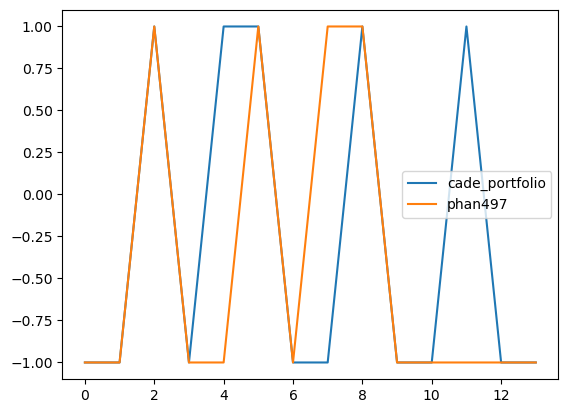

In [42]:
cade_crypto_performance_df[["cade_portfolio", "phan497"]][:14].plot()

In [355]:
stats.pearsonr(cade_crypto_performance_df["cade_portfolio"], cade_crypto_performance_df["phan497"])

PearsonRResult(statistic=0.5185449728701348, pvalue=0.0574629263206024)

# Management Efficiency Stuff

So, one thing we want to calculate is the best POSSIBLE lineup (maximum possible points) for a given week - such that we can aggregate these over the season to figure out who got the most possible points OVER THE ENTIRE SEASON.

However, doing this is non trivial...

For one, although we have player points for a given roster very day, we don't have the associated positions of the players...so we'll have to look this up...so we'll start by making a new function

In [326]:
from pulp import *
from itertools import permutations

def eval_players(players, df):
    return sum([df[df.name == player].iloc[0].pts for player in players])

def calc_max_points_week(players_points, nfl_player_df, starter_position_list = ['QB', 'Flex', 'RB', 'RB', 'WR', 'WR', 'TE', 'K', 'DEF']):
    """Given a dictionary relating a player_ID ('sleeper') and a weekly score,
       find and return the maximum possible number of points"""
    player_position = dict()
    player_names = dict()
    for player_id in list(players_points.keys()):
        player_position[player_id] = str(nfl_player_df.loc[nfl_player_df.player_id == player_id].position.item()).split('.')[1]
        player_names[player_id] = nfl_player_df.loc[nfl_player_df.player_id == player_id].full_name.item()
    tmpDf = pd.DataFrame.from_dict([players_points, player_position, player_names]).T.rename(columns = {0:"pts", 1:'pos', 2:"name"})
    tmpDf['pts']=tmpDf.pts.astype('float')
    
    availables = tmpDf[["pos", "name", "pts"]].groupby(['pos', 'name', 'pts']).agg('count')
    availables = availables.reset_index()
    
    ##################################################################
    # Set constraints
    ##################################################################
    points = {}
    players = {}

    for position in availables.pos.unique():
        available_for_position = availables[availables.pos == position]
        players[position] = list(available_for_position.name.values)

        points[position] = {
            player_name : _points for player_name, _points in
            zip(players[position], available_for_position.pts.values)
        }  
        
    positions_available = {
        "QB" : 1,
        "RB" : 2,
        "WR" : 2,
        "TE" : 1,
        "FLEX" : 1,
        "K" : 1,
        "DEF" : 1
    }
    
    flexible_positions = ("RB", "WR", "TE")
    
    # Player variables['QB'][15033483] denotes whether Lamar Jackson is selected
    variables = {position: LpVariable.dict(position, players[position], cat="Binary")
             for position in players}

    ##################################################################
    # Problem Definition
    ##################################################################

    prob = LpProblem("Fantasy", LpMaximize)
    rewards = []
    costs = []
    number_of_selected_players = []

    for position, players in variables.items():
        for player, player_selected in players.items():
            # If this player is selected, he will add salaries and points
            rewards += points[position][player] * player_selected
            number_of_selected_players += player_selected

        # Of this position, if it does not support FLEX, at most `positions_available`
        # are supported. If it does support FLEX, increment that by
        # `flexible_positions_available`
        if position not in flexible_positions:
            prob += lpSum(players.values()) == positions_available[position]
        else:
            # We need at least `positions_available` players on this position and at
            # most`positions_available + flexible_positions_available` players
            prob += lpSum(players.values()) >= positions_available[position]
            prob += (lpSum(players.values())
                              <= positions_available[position] + positions_available["FLEX"])

    # In total, we need exactly `positions_available` players
    prob += lpSum(number_of_selected_players) == sum(positions_available.values())
    prob += lpSum(rewards)

    prob.solve()
    
   
    return prob.objective.value()


In [327]:
max_pts_list = []

for index, roster in matchup_df.iterrows():
    max_pts_list.append(calc_max_points_week(roster.players_points, nfl_player_df))
    
matchup_df['maximum_possible_points'] = max_pts_list

In [350]:
matchup_df.groupby(['week', 'matchup_id'])

,custom_points,matchup_id,players,players_points,points,roster_id,starters,starters_points,week,maximum_possible_points
0,None,2,"[BAL, 8138, 7606, 7066, 6083, 5872, 5849, 5022...","{'BAL': 13.0, '8138': -2.8, '7606': 2.3, '7066...",106.32,1,"[5849, 4663, 4137, 5872, 2197, 5022, 4950, 608...","[20.62, 9.2, 13.0, 10.6, 11.7, 7.5, 14.7, 6.0,...",1,108.92
1,None,7,"[DAL, 8126, 8119, 7600, 7543, 6904, 5955, 5937...","{'DAL': 5.0, '8126': 1.0, '8119': 16.5, '7600'...",122.42,2,"[6904, 4866, 7543, 2449, 5937, 7600, 5955, 391...","[24.72, 29.4, 6.5, 22.2, 8.0, 10.0, 2.6, 14.0,...",1,137.22
2,None,6,"[NE, 8153, 8129, 8121, 7525, 7523, 6806, 6790,...","{'NE': 6.0, '8153': 0.0, '8129': 4.4, '8121': ...",79.90,3,"[7523, 6790, 8129, 4983, 7525, 5012, 4040, 367...","[14.4, 25.0, 4.4, 6.5, 0.0, 7.7, 6.9, 9.0, 6.0]",1,96.76
3,None,5,"[TB, 8112, 7553, 7090, 6828, 5110, 4199, 4149,...","{'TB': 13.0, '8112': 9.9, '7553': 2.9, '7090':...",86.06,4,"[3294, 4199, 6828, 2133, 4068, 7553, 8112, 17,...","[5.46, 9.1, 17.6, 25.1, 2.0, 2.9, 9.9, 1.0, 13.0]",1,101.76
4,None,5,"[BUF, 8205, 8154, 8139, 7526, 5906, 5846, 5086...","{'BUF': 17.0, '8205': 11.2, '8154': 0.0, '8139...",96.40,5,"[4046, 3198, 3164, 7526, 5846, 5906, 5086, 126...","[33.9, 7.2, 5.4, 15.7, 4.1, 1.0, 6.1, 6.0, 17.0]",1,105.50
...,...,...,...,...,...,...,...,...,...,...
191,None,6,"[MIN, 8146, 8132, 7839, 7607, 7564, 6943, 6786...","{'MIN': -1.0, '8146': 10.8, '8132': 0.0, '7839...",97.96,10,"[1049, 7607, 2161, 7564, 6786, 5844, 8146, 783...","[17.76, 0.5, 28.9, 23.5, 5.8, 7.7, 10.8, 4.0, ...",14,97.96
192,None,4,"[BAL, 8228, 8150, 7611, 6803, 6650, 650, 6126,...","{'BAL': 11.0, '8228': 3.7, '8150': 3.4, '7611'...",105.12,11,"[167, 5850, 7611, 3321, 2309, 5001, 4018, 650,...","[12.12, 18.4, 2.0, 22.1, 5.2, 11.7, 11.6, 11.0...",14,115.82
193,None,7,"[TB, 8142, 7591, 6801, 6770, 5967, 4993, 49, 4...","{'TB': -1.0, '8142': 0.0, '7591': 0.0, '6801':...",80.76,12,"[6770, 5967, 4029, 2374, 6801, 4033, 4098, 49,...","[17.56, 20.2, 7.1, 14.5, 0.0, 15.2, 2.2, 5.0, ...",14,89.56
194,None,4,"[CLE, 8205, 8151, 7670, 7594, 6826, 6824, 6149...","{'CLE': 4.0, '8205': 10.8, '8151': 0.0, '7670'...",91.76,13,"[5870, 4988, 8205, 1689, 7670, 5857, 6824, 509...","[19.36, 6.9, 10.8, 16.0, 7.3, 0.0, 15.4, 12.0,...",14,102.26


In [353]:
efficiency_df = matchup_df.groupby("roster_id").agg({'points':'sum', 'maximum_possible_points':'sum'})
efficiency_df["percent_possible"] = efficiency_df.points / efficiency_df.maximum_possible_points
efficiency_df = efficiency_df.sort_values(by = "percent_possible", ascending = False)

efficiency_df.index = [roster_dict[i] for i in list(efficiency_df.index)]
efficiency_df.to_csv(processed_data_directory / 'manager_efficiencies.csv')
efficiency_df

,points,maximum_possible_points,percent_possible
petenotpetey,1591.06,1712.46,0.929108
julesdefwatchesftbll,1292.52,1395.08,0.926485
carlogesualdo,1479.88,1607.40,0.920667
mattlatham,1295.70,1413.20,0.916855
ujthechamp,1424.66,1559.44,0.913572
lauramarkey,1573.98,1729.10,0.910289
emilyhan,1322.66,1463.04,0.904049
alexludtke,1290.44,1430.06,0.902368
niclath95,1393.34,1551.70,0.897944
jakesmyth,1266.72,1420.32,0.891855


In [354]:
efficiency_df.sort_values(by = "points", ascending = False)

,points,maximum_possible_points,percent_possible
petenotpetey,1591.06,1712.46,0.929108
lauramarkey,1573.98,1729.10,0.910289
llatham65,1492.98,1686.88,0.885054
carlogesualdo,1479.88,1607.40,0.920667
anahan,1453.50,1635.12,0.888926
ujthechamp,1424.66,1559.44,0.913572
niclath95,1393.34,1551.70,0.897944
emilyhan,1322.66,1463.04,0.904049
andyhan4,1306.02,1508.14,0.865981
mattlatham,1295.70,1413.20,0.916855
